 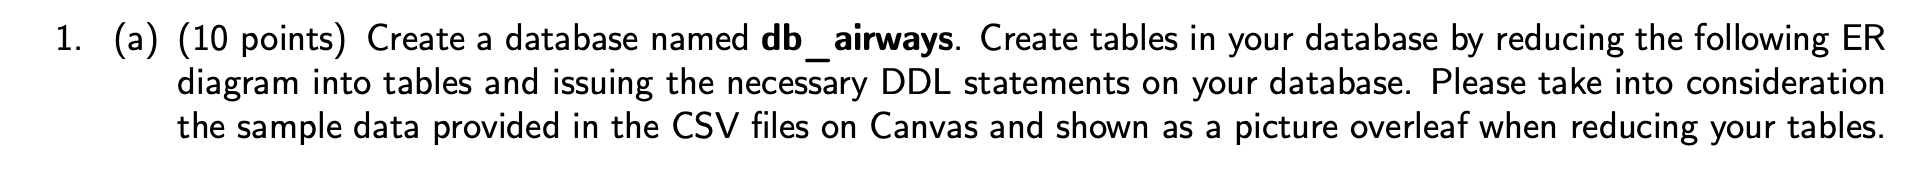

In [5]:
import mysql.connector

def main():
    mydb = mysql.connector.connect(
      host="localhost",
      user="root",
    database='db_airways'
    )

    cursor = mydb.cursor()



    sql ="""
    
            CREATE TABLE `aircraft` (
          `serial_no` int(20),
          `model_no` varchar(40) PRIMARY KEY
        );

        CREATE TABLE `can_fly` (
          `employee_no` int(20),
          `modle_no` varchar(20),
          PRIMARY KEY (`employee_no`, `modle_no`)
        );

        CREATE TABLE `departure` (
          `departure_date` varchar(60),
          `number` int(20),
          PRIMARY KEY (`departure_date`, `number`)
        );

        CREATE TABLE `employee` (
          `name` char(30),
          `salary` varchar(50),
          `employee_no` int(20),
          PRIMARY KEY (`name`, `employee_no`)
        );

        CREATE TABLE `flight` (
          `number` int(30) PRIMARY KEY,
          `origin` varchar(10),
          `destination` varchar(10),
          `departure_time` varchar(10),
          `arrival_time` varchar(10),
          `status` varchar(40)
        );

        CREATE TABLE `person` (
          `name` char(30) PRIMARY KEY,
          `address` varchar(100),
          `phone` varchar(50)
        );

        CREATE TABLE `pilot` (
          `employee_no` int(20) PRIMARY KEY,
          `flight_hours` int(15)
        );

        CREATE TABLE `plan` (
          `maker` varchar(30),
          `model_no` varchar(20) PRIMARY KEY
        );

        CREATE TABLE `passanger_booking` (
          `name` char(30),
          `ticket_number` varchar(40),
          `departure_date` varchar(60),
          `flight_number` int(20),
          PRIMARY KEY (`name`, `ticket_number`, `departure_date`, `flight_number`)
        );

        CREATE TABLE `employees_assigned_to_flight` (
          `employee_no` int(20),
          `departure_date` varchar(60),
          `number` int(20)
        );

        ALTER TABLE `aircraft` ADD FOREIGN KEY (`model_no`) REFERENCES `plan` (`model_no`);

        ALTER TABLE `pilot` ADD FOREIGN KEY (`employee_no`) REFERENCES `can_fly` (`employee_no`);

        ALTER TABLE `departure` ADD FOREIGN KEY (`number`) REFERENCES `flight` (`number`);

        ALTER TABLE `person` ADD FOREIGN KEY (`name`) REFERENCES `employee` (`name`);

        ALTER TABLE `pilot` ADD FOREIGN KEY (`employee_no`) REFERENCES `employee` (`employee_no`);

        ALTER TABLE `plan` ADD FOREIGN KEY (`model_no`) REFERENCES `can_fly` (`modle_no`);

        ALTER TABLE `passanger_booking` ADD FOREIGN KEY (`departure_date`) REFERENCES `departure` (`departure_date`);

        ALTER TABLE `passanger_booking` ADD FOREIGN KEY (`name`) REFERENCES `person` (`name`);

        ALTER TABLE `employees_assigned_to_flight` ADD FOREIGN KEY (`departure_date`) REFERENCES `departure` (`departure_date`);

        ALTER TABLE `employees_assigned_to_flight` ADD FOREIGN KEY (`employee_no`) REFERENCES `employee` (`employee_no`);

        ALTER TABLE `passanger_booking` ADD FOREIGN KEY (`flight_number`) REFERENCES `departure` (`number`);

        ALTER TABLE `employees_assigned_to_flight` ADD FOREIGN KEY (`number`) REFERENCES `departure` (`number`);

        """
    cursor.execute(sql,multi=True)
    
    
    cursor.close()

main()

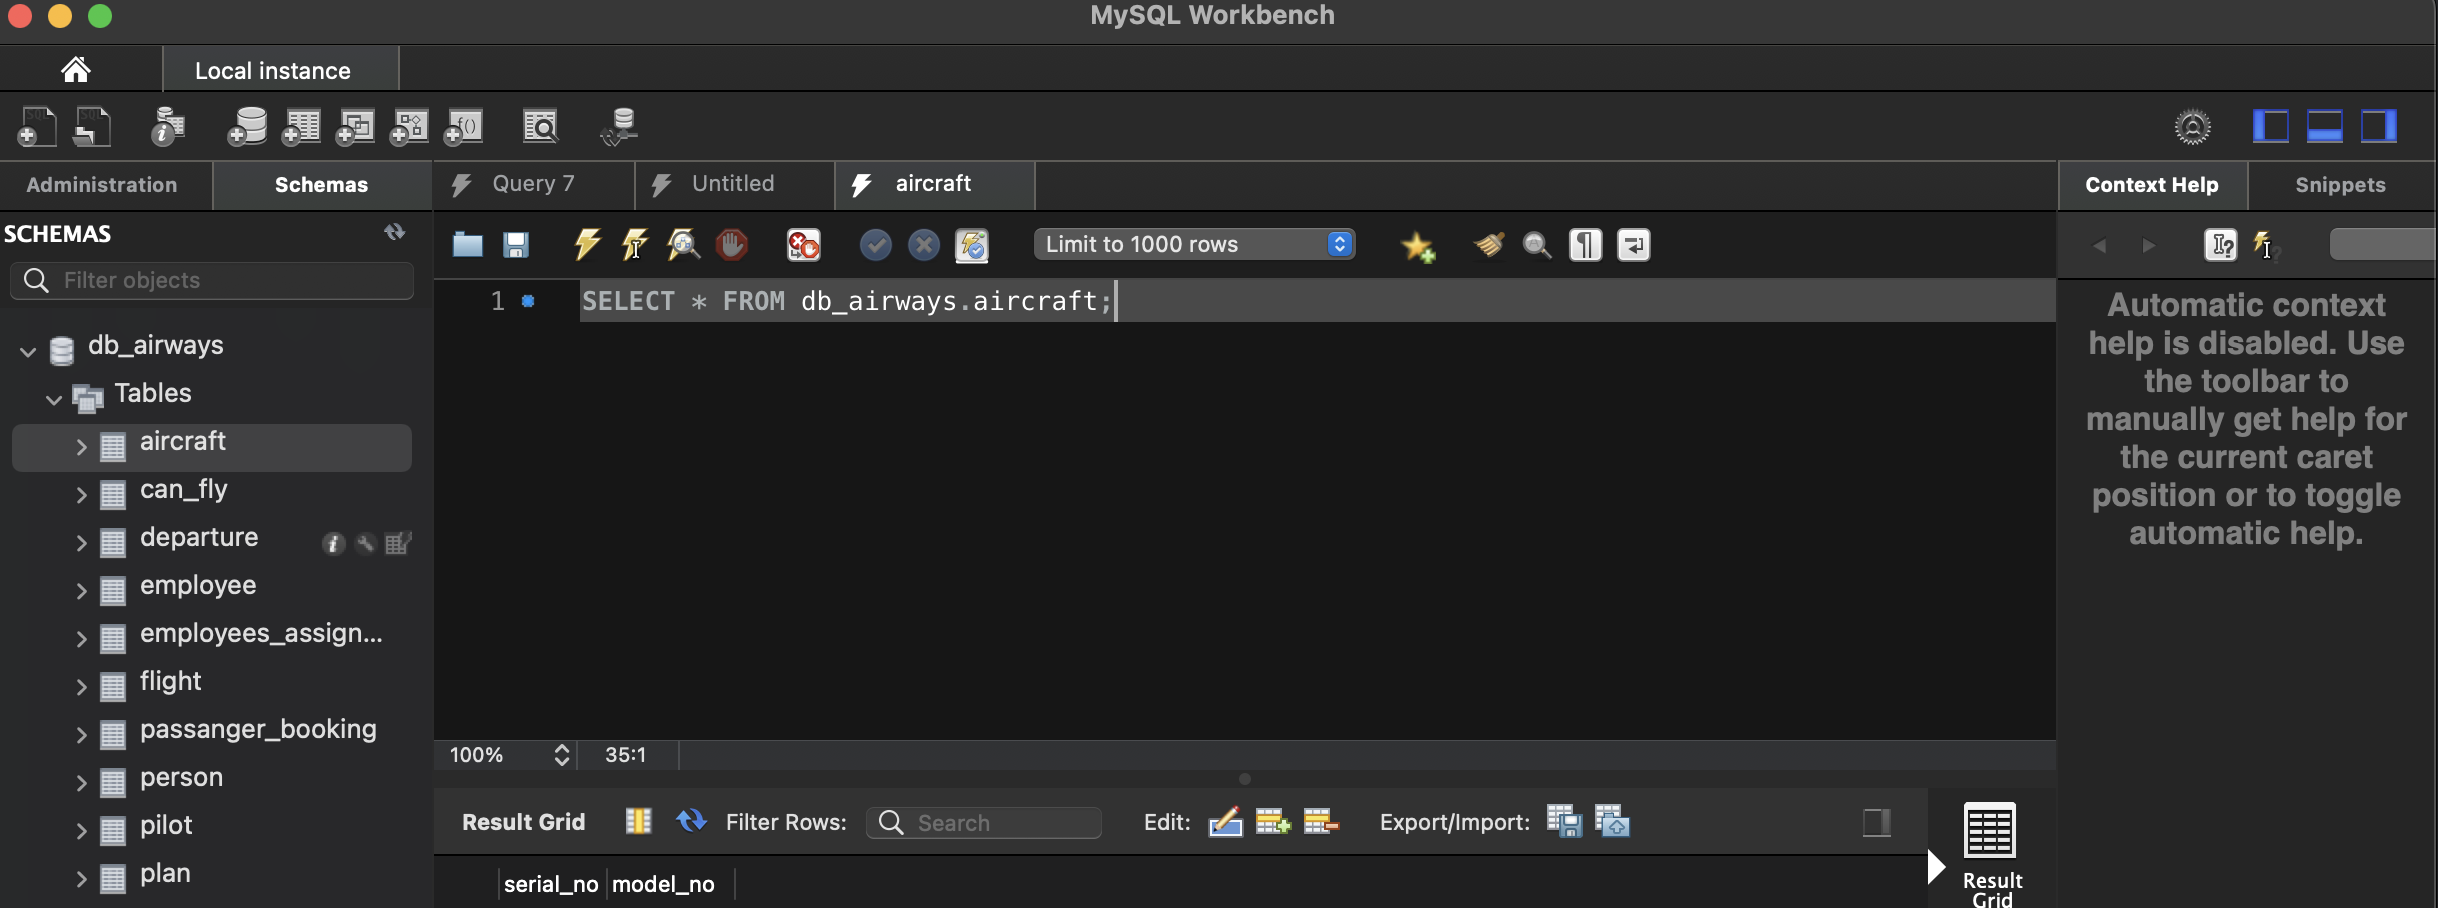

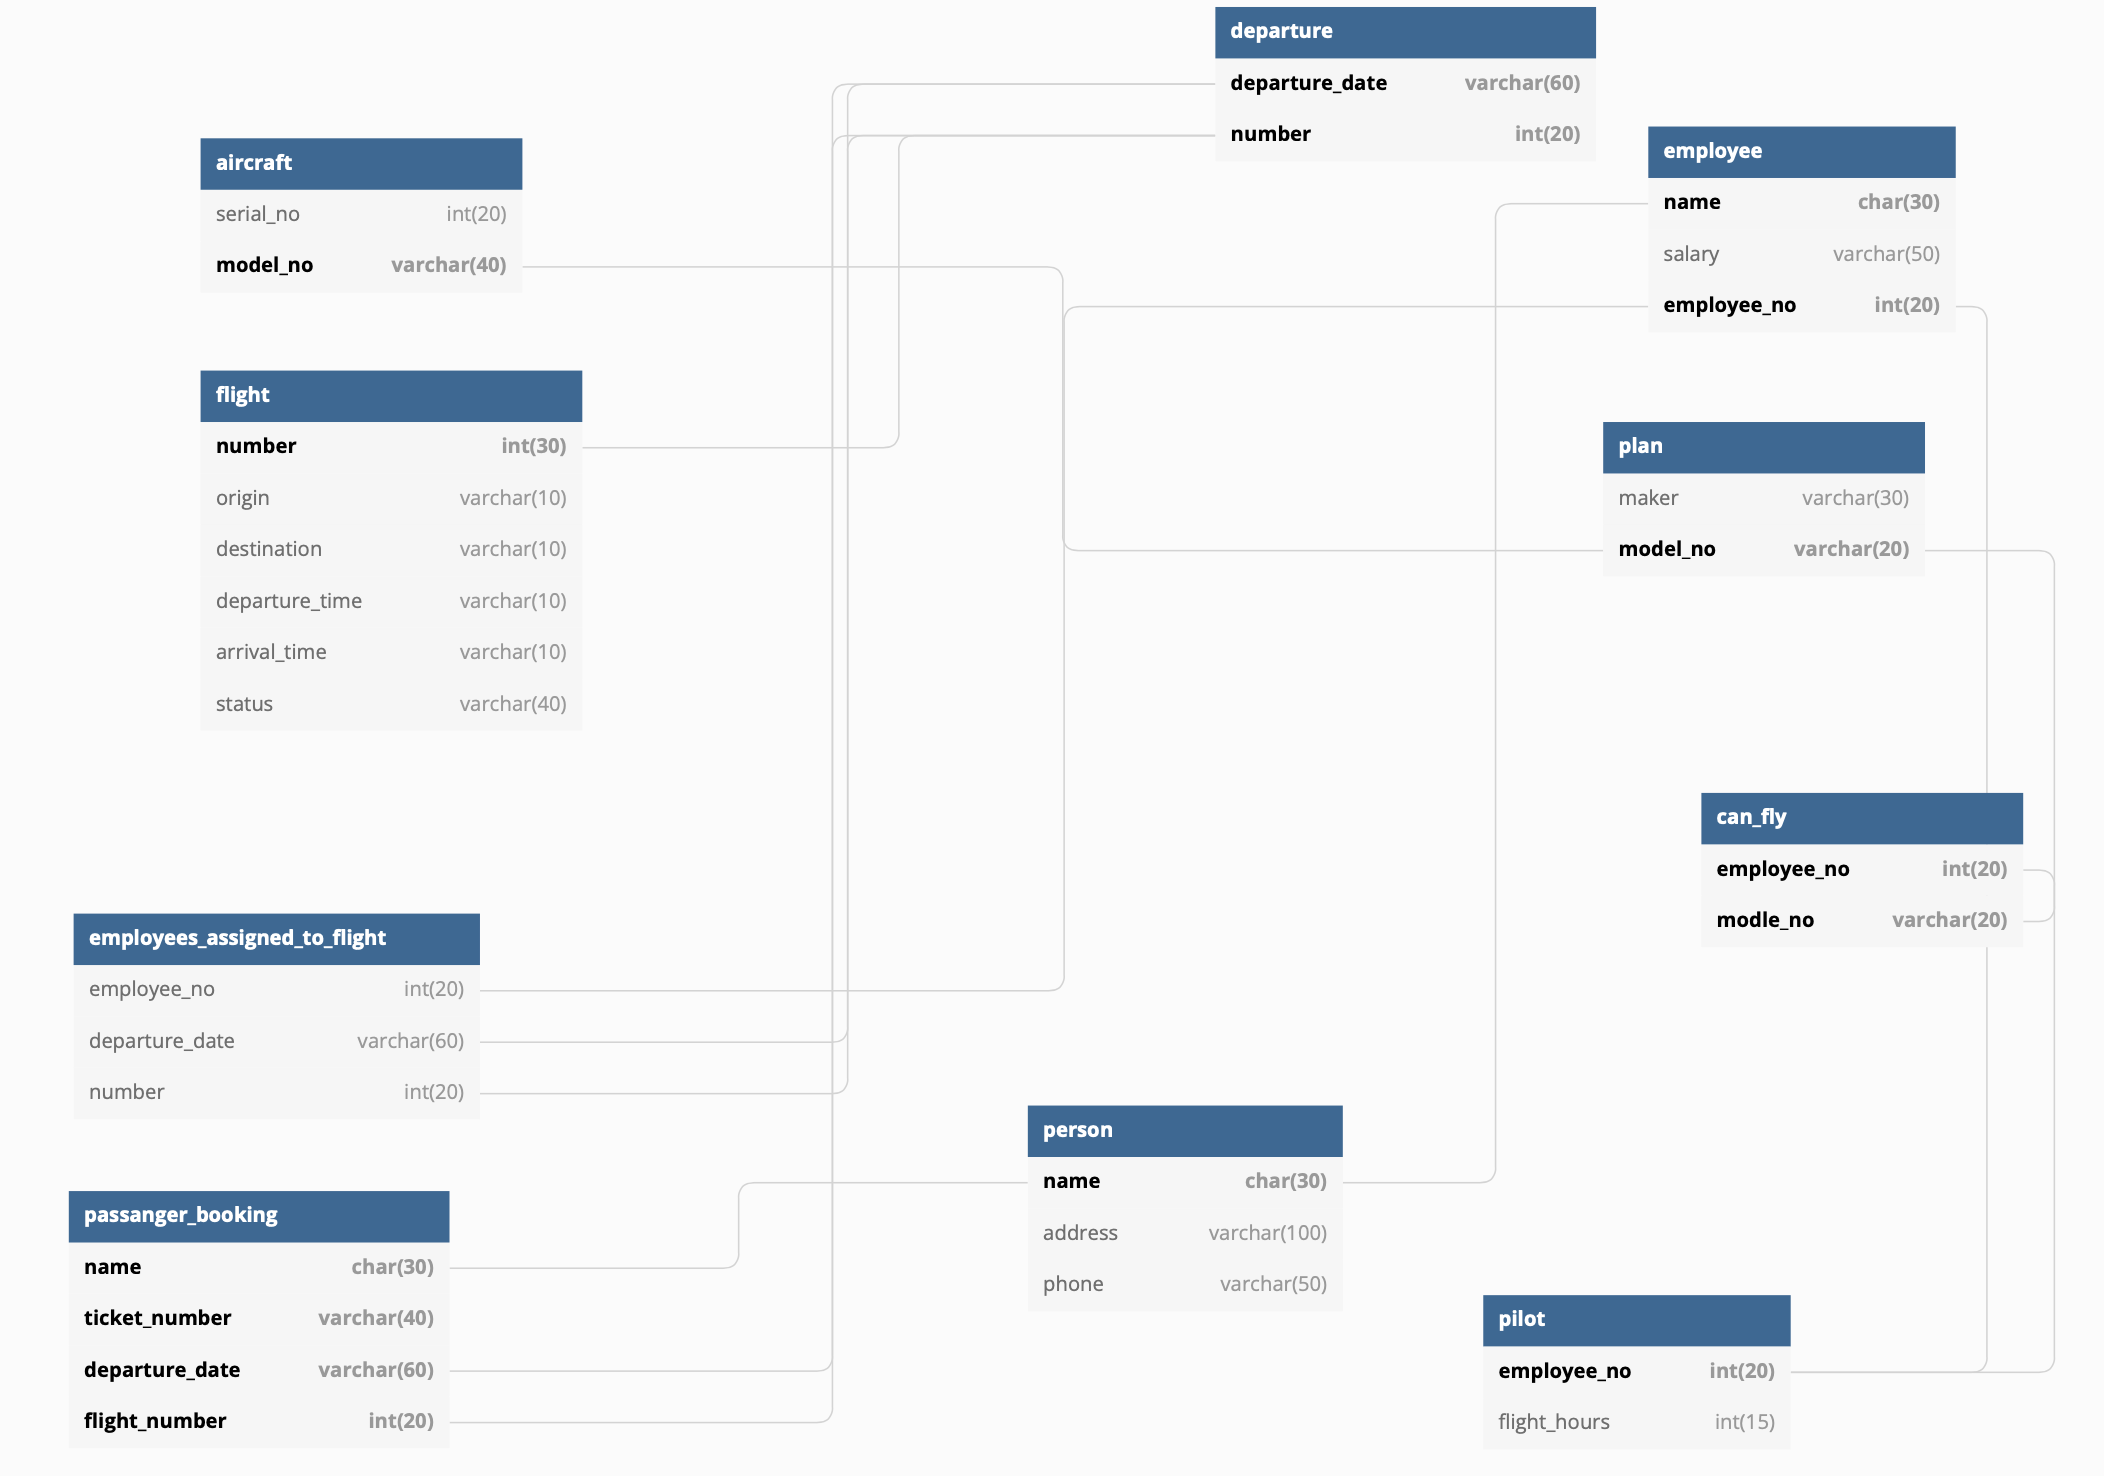

# Inserting Data 

In [40]:
import mysql.connector
import csv


def main():
    conn = mysql.connector.connect(host="localhost",user="root",database='db_airways')
    
    tables=["can_fly.csv","employee.csv","flight.csv",
            "person.csv","pilot.csv","plane.csv","aircraft.csv"]
    dates=["June 30, 2022","July 8, 2022"]
    count=0
    sql1="""
    INSERT INTO plan(maker, model_no) VALUES(%s, %s);"""
    sql2="""
    INSERT INTO can_fly(employee_no, modle_no) VALUES(%s, %s);"""
    
    sql3="""
    INSERT INTO pilot(employee_no, flight_hours) VALUES(%s, %s);"""
    
    sql4="""
    INSERT INTO employee(name, salary,employee_no) VALUES(%s, %s, %s);"""
    
    sql5="""
    INSERT INTO departure(departure_date,number) VALUES(%s, %s);"""
    
    sql6="""
    INSERT INTO flight(number,origin,destination,departure_time,arrival_time,status) VALUES(%s, %s, %s, %s, %s, %s);"""
    
    sql7="""
    INSERT INTO person(name, address, phone) VALUES(%s, %s, %s);"""
    
    sql8="""
    INSERT INTO aircraft(serial_no, model_no) VALUES(%s, %s);"""
    
    if conn.is_connected() == True:
        
        print("Connection Successful")
        cursor=conn.cursor()
        special_sql=""" 
                            INSERT INTO departure(date,flight_number)
                            VALUES
                            ("June 30, 2022",100),
                            ("June 30, 2022",112), 
                            ("June 30, 2022",206),
                            ("June 30, 2022",334),
                            ("June 30, 2022",335),
                            ("June 30, 2022",337),
                            ("June 30, 2022",449),
                            ("July 8, 2022",100),
                            ("July 8, 2022",112),
                            ("July 8, 2022",206),
                            ("July 8, 2022",334),
                            ("July 8, 2022",395),
                            ("July 8, 2022",991)
                            """
        cursor.execute(special_sql)
        try:
            
            for table in tables:
                
                with open(table,'r') as csvfile:
                    

                    reader = csv.reader(csvfile)
                    next(reader)
                    for record in csvfile:
                        
                        if table == "can_fly.csv":
                            employee_no, modle_no=record.split(',')
                            modle_no = modle_no.rstrip()
                            row=(employee_no, modle_no)
                            #print(row)
                            #cursor.execute(sql2,row)
                            
                        if table == "plane.csv":
                            maker, modle_no=record.split(',')
                            modle_no = modle_no.rstrip()
                            row=(employee_no, modle_no)
                            #print(row)
                            #cursor.execute(sql1,row)
                        
                        if table == "pilot.csv":
                            employee_no, flight_hours=record.split(',')
                            flight_hours = flight_hours.rstrip()
                            row=(employee_no, flight_hours)
                            #print(row)
                            #cursor.execute(sql3,row)
                            
                        if table == "employee.csv":
                            name, salary,employee_no=record.split(',')
                            employee_no = employee_no.rstrip()
                            row=(name, salary,employee_no)
                            #print(row)
                            #cursor.execute(sql4,row)
                            
                            
                        if table == "flight.csv":
                            number,origin,destination,departure_time,arrival_time,status=record.split(',')
                            status = status.rstrip()
                            row=(number,origin,destination,departure_time,arrival_time,status)
                            #print(row)
                            #cursor.execute(sql6,row)
                            
                        if table == "person.csv":
                            name, address, phone=record.split(',')
                            phone = phone.rstrip()
                            row=(name, address, phone)
                            #print(row)
                            #cursor.execute(sql7,row)
                            
                        if table == "aircraft.csv":
                            serial_no, model_no=record.split(',')
                            model_no = model_no.rstrip()
                            row=(serial_no, model_no)
                            #print(row)
                            #cursor.execute(sql8,row)
                            
                        
                conn.commit()
        except mysql.connector.Error as error:
            print(error)
            conn.rollback()
    conn.close()
main()




Connection Successful


# b)
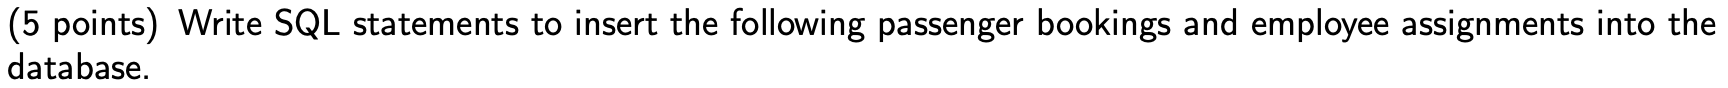

In [50]:
import mysql.connector
import csv


def main():
    conn = mysql.connector.connect(host="localhost",user="root",database='db_airways')
    cursor=conn.cursor()
    cursor.execute("""
                INSERT INTO passanger_booking (name,departure_date,flight_number,ticket_number)
                VALUES
                ("Smith","June 30, 2022",100,"DBA001"),
                ("Green","June 30, 2022",206,"DBA002"),
                ("Hooper","June 30, 2022",334,"DBA003"),
                ("Edwards","June 30, 2022",449,"DBA004"),
                ("MacBride","July 8, 2022",991,"DBA005"), 
                ("Gates","July 8, 2022",991,"DBA006"), 
                ("Rowe","July 8, 2022",100,"DBA007"), 
                ("Clark","July 8, 2022",100,"DBA008"),
                ("Phillips","June 30, 2022",449,"DBA009"),
                ("Warnock","June 30, 2022",449,"DBA010"),
                ("Smith","July 8, 2022",991,"DBA011"),
                ("Peters","July 8, 2022",100,"DBA012")
                """)
    cursor.execute("""
                INSERT INTO employees_assigned_to_flight (employee_no,departure_date,number)
                VALUES
                (1001,"June 30, 2022", 100),
                (1002,"June 30, 2022", 100),
                (1003,"June 30, 2022", 100),
                (1004,"June 30, 2022", 100),
                (1007,"June 30, 2022", 206),
                (1003,"June 30, 2022", 337),
                (1004,"June 30, 2022", 337),
                (1005,"June 30, 2022", 337),
                (1006,"June 30, 2022", 337),
                (1001,"July 8, 2022", 100),
                (1002,"July 8, 2022", 100),
                (1006,"July 8, 2022", 991),
                (1007,"July 8, 2022", 991),
                (1007,"July 8, 2022", 112)
                """)
    
    
    conn.commit()
    
    print()
    cursor.close()
    
main()

In [61]:
import mysql.connector
import csv


def main():
    conn = mysql.connector.connect(host="localhost",user="root",database='db_airways')
    cursor=conn.cursor()
    sql_query="""
    SELECT * FROM db_airways.passanger_booking"""
    cursor.execute(sql_query)
    store=cursor.fetchall()
    print(f'{"name":^10}{"departure_date":^25}{"flight_number":^20}{"ticket_number":^20}')
    for rows in store:
        
        print(f'{rows[0]:^10}{rows[1]:^25}{rows[2]:^20}{rows[3]:^20}')    
    print()
    cursor.close()
    
main()


   name        departure_date         flight_number       ticket_number    
  Smith         June 30, 2022              100                DBA001       
  Green         June 30, 2022              206                DBA002       
  Hooper        June 30, 2022              334                DBA003       
 Edwards        June 30, 2022              449                DBA004       
 MacBride       July 8, 2022               991                DBA005       
  Gates         July 8, 2022               991                DBA006       
   Rowe         July 8, 2022               100                DBA007       
  Clark         July 8, 2022               100                DBA008       
 Phillips       June 30, 2022              449                DBA009       
 Warnock        June 30, 2022              449                DBA010       
  Smith         July 8, 2022               991                DBA011       
  Peters        July 8, 2022               100                DBA012       



In [56]:
import mysql.connector
import csv


def main():
    conn = mysql.connector.connect(host="localhost",user="root",database='db_airways')
    cursor=conn.cursor()
    sql_query="""
    SELECT * FROM db_airways.employees_assigned_to_flight"""
    cursor.execute(sql_query)
    store=cursor.fetchall()
    print(f'{"employee_no":20}{"departure_date":25}{"flight_number":20}')
    for rows in store:
        
        print(f'{rows[0]:^10}{rows[1]:^25}{rows[2]:^20}')    
    print()
    cursor.close()
    
main()



employee_no         departure_date           flight_number       
   1001         June 30, 2022              100         
   1002         June 30, 2022              100         
   1003         June 30, 2022              100         
   1004         June 30, 2022              100         
   1007         June 30, 2022              206         
   1003         June 30, 2022              337         
   1004         June 30, 2022              337         
   1005         June 30, 2022              337         
   1006         June 30, 2022              337         
   1001         July 8, 2022               100         
   1002         July 8, 2022               100         
   1006         July 8, 2022               991         
   1007         July 8, 2022               991         
   1007         July 8, 2022               112         



## c)
(5 points) Write a single query that returns a list of all passengers on flight 991. By single query we mean making a single trip to the database. Include the following fields in your result: passenger_name, ticket_number, address, phone

In [62]:
import mysql.connector



def main():
    conn = mysql.connector.connect(host="localhost",user="root",database='db_airways')
    cursor=conn.cursor()
    sql_query="""
    SELECT passanger_booking.name, passanger_booking.ticket_number, person.address, person.phone
    
    FROM db_airways.person,db_airways.passanger_booking
    
    where db_airways.passanger_booking.flight_number=991 
    
    and db_airways.person.name= db_airways.passanger_booking.name"""
    cursor.execute(sql_query)
    store=cursor.fetchall()
    print(f'{"passenger_name":20}{"ticket_number":25}{"address":20}{"phone":20}')
    for rows in store:
        
        print(f'{rows[0]:^10}{rows[1]:^25}{rows[2]:^20}{rows[3]:^20}')    
    print()
    cursor.close()
    
main()



passenger_name      ticket_number            address             phone               
 MacBride          DBA005              789 Fir St.             null        
  Gates            DBA006             285 Kapok St.        801-493-2203    
  Smith            DBA011              123 Elm St.         801-556-2239    



## d)
(10 points) It has been estimated that airline pilots fly an average of 75 hours per month. Write a procedure named “estimate_pilot_years” that accepts a pilot’s employee ID and returns the number of years the pilot has been flying based on their flight hours in the database. (Assume the pilots at DB Airways work for 12 months per year. Do not worry about overtime, breaks, or any other complicating factor). Test your procedure by returning the estimated years for all pilots in the database.

In [5]:
import mysql.connector

def main():
    conn = mysql.connector.connect(host="localhost",user="root",database='db_airways')
    cursor=conn.cursor()
    beauty=["1001","1002","1003"]
    count=0
    
    sql_query="""
    USE `db_airways`;
    DROP procedure IF EXISTS `db_airways`.`estimate_pilot_years`;
    CREATE PROCEDURE `estimate_pilot_years`(IN value int(40),out final_out decimal(10,2))
    BEGIN
    DECLARE store int(20);
    
    SELECT pilot.flight_hours into store
    FROM pilot where value= pilot.employee_no;
    set final_out= (store/75)/12;
    END
    """
    
    cursor.execute(sql_query, multi=True)
    
    sql_query2="""set @final_out = '0';
    call db_airways.estimate_pilot_years(1001, @final_out);
    select @final_out;
    set @final_out = '0';
    call db_airways.estimate_pilot_years(1002, @final_out);
    select @final_out;
    set @final_out = '0';
    call db_airways.estimate_pilot_years(1003, @final_out);
    select @final_out;
    """
    store1=[]
    for result in cursor.execute(sql_query2, multi=True):
        store=result.fetchall()
        store1 = store1 + store
#         if store:
#             print(store)
    for rows in store1:
        #rows=rows.rstrip("Decimal","()")
        print("Employee no",beauty[count],"has been flying",rows[0],"years")
        count+=1
    
    conn.close()    
    
main()

Employee no 1001 has been flying 6.67 years
Employee no 1002 has been flying 26.67 years
Employee no 1003 has been flying 16.67 years
